In [1]:
from warnings import filterwarnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filterwarnings('ignore')

# Görev 1:  Metin Ön İşleme İşlemlerini Gerçekleştiriniz.

In [5]:
df = pd.read_csv("datasets\Case2\wiki_data.csv", encoding="utf-8")

In [6]:
df = df[:2000] # İlerleyen yerlerde OOM = Out of Memory hatası aldığım için veriyi küçülttüm.

In [7]:
df

Unnamed: 0                                               text
0              1  Anovo\n\nAnovo (formerly A Novo) is a computer...
1              2  Battery indicator\n\nA battery indicator (also...
2              3  Bob Pease\n\nRobert Allen Pease (August 22, 19...
3              4  CAVNET\n\nCAVNET was a secure military forum w...
4              5  CLidar\n\nThe CLidar is a scientific instrumen...
...          ...                                                ...
1995        1996  Edinburgh Calotype Club\n\nThe Edinburgh Calot...
1996        1997  Endrin\n\nEndrin is an organochloride with the...
1997        1998  Ethylene glycol dinitrate\n\nEthylene glycol d...
1998        1999  Forges de Syam\n\nThe Forges de Syam (Syam For...
1999        2000  Frank-Kamenetskii theory\n\nIn combustion, Fra...

[2000 rows x 2 columns]

## Adım 1: Metin ön işleme için clean_text adında fonksiyon oluşturunuz.  Fonksiyon;
•Büyük küçük harf dönüşümü,

•Noktalama işaretlerini çıkarma,

•Numerik ifadeleri çıkarma Işlemlerini gerçekleştirmeli.



In [51]:
import unicodedata
df["text"] = df["text"].apply(lambda x: unicodedata.normalize("NFKD", x).encode("ascii", "ignore").decode()) # â,Â gibi ifadeleri a,A şekline dönüştürüyor.

In [50]:
def clean_text(text):
    text = text.str.lower() #büyük küçük harf dönüşümü

    text = text.str.replace("\n", " ", regex=True) #\n ifadesinin yerine bir karakter boşluk ekleyecek
    text = text.str.replace("[^\w\s]", "", regex=True) #Noktalama işaretlerini kaldırır
    text = text.str.replace("\d", "", regex=True) #Sayılsal ifadeleri kaldırır. \d+ sayısal ifade ve şekilleri kaldırır.
    return text

## Adım 2: Yazdığınız fonksiyonu veri seti içerisindeki tüm metinlere uygulayınız.

In [9]:
df["text"] = clean_text(df["text"])
df.head(10)

Unnamed: 0                                               text
0           1  anovo  anovo formerly a novo is a computer ser...
1           2  battery indicator  a battery indicator also kn...
2           3  bob pease  robert allen pease august  â â june...
3           4  cavnet  cavnet was a secure military forum whi...
4           5  clidar  the clidar is a scientific instrument ...
5           6  capacity loss  capacity loss or capacity fadin...
6           7  carbon recycling international  carbon recycli...
7           8  chemical agent resistant coating  chemical age...
8           9  claas cougar  the claas cougar is a selfpropel...
9          10  conductive polymer  conductive polymers or mor...

## Adım 3: Metin içinde öznitelik çıkarımı yaparken önemli olmayan kelimeleri çıkaracak remove_stopwords adında fonksiyon yazınız.

In [10]:
from nltk.corpus import stopwords

def remove_stopwords(word):
    stop_words = stopwords.words("English")
    word = word.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    return word

List Comprehension kullanmadan yazılışı nasıl olur?
```Python
cleaned_text = []
for x in df["text"]:
    kelimeler = str(x).split() #Metni kelimelere ayırma.
    filtered_words = [] #Stopwords olmayan kelimeler
    
    for y in kelimeler: #Her kelimeyi kontrol etme
        if y not in stopwords.words("English"): #Kelime, Stopwords içerisinde değilse
            filtered_words.append(y) # Kelimeyi filtreli kısma ekle

    # Stopwords olmayan (filtered_words) kelimeleri cleaned_text'e ekle.
    cleaned_text.append(" ".join(filtered_words))

#En son temizlenmiş olan veriyi de dataframe'e atayalım
df["text"] = cleaned_text
```
Yaklaşık otuz dakika sürdü.

---

## Adım 4: Yazdığınız fonksiyonu veri seti içerisindeki tüm metinlere uygulayınız.

In [11]:
df["text"] = remove_stopwords(df["text"])

## Adım 5: Metinde az geçen (1000'den az, 2000'den az gibi) kelimeleri bulunuz. Ve bu kelimeleri metin içerisinden çıkartınız. 

In [12]:
Az_Gecen_Kelimeler = pd.Series(" ".join(df["text"]).split()).value_counts()[-1000:] # Az geçen kelimeler

```python
den = pd.Series(" ".join(df["text"]).split()).value_counts()
den
den[den < 2]
```

Yukarıdaki kod aklıma takıldı. Frekans değeri 1 olanları sayısı 90k civarı. Frekans değeri olanları sayısı ise 170k civarı. Frekansı 1 olanları veri setinden çıkartırsam herhangi bir şey değişir mi?

In [13]:
df["text"] = df["text"].apply(lambda y: " ".join(x for x in y.split() if x not in Az_Gecen_Kelimeler)) #Az geçen kelimeleri metin içerisinden çıkarttık.

In [14]:
df["text"]

0       anovo anovo formerly novo computer services co...
1       battery indicator battery indicator also known...
2       bob pease robert allen pease august â â june a...
3       cavnet cavnet secure military forum became ope...
4       clidar clidar scientific instrument used measu...
                              ...                        
1995    edinburgh calotype club edinburgh calotype clu...
1996    endrin endrin chemical formula first produced ...
1997    ethylene glycol dinitrate ethylene glycol dini...
1998    forges de syam forges de syam syam forges forg...
1999    frankkamenetskii theory combustion frankkamene...
Name: text, Length: 2000, dtype: object

## Adım 6: Metinleri tokenize edip sonuçları gözlemleyiniz.

In [15]:
from textblob import TextBlob

In [16]:
df["text"].apply(lambda x: TextBlob(x).words)

0       [anovo, anovo, formerly, novo, computer, servi...
1       [battery, indicator, battery, indicator, also,...
2       [bob, pease, robert, allen, pease, august, â, ...
3       [cavnet, cavnet, secure, military, forum, beca...
4       [clidar, clidar, scientific, instrument, used,...
                              ...                        
1995    [edinburgh, calotype, club, edinburgh, calotyp...
1996    [endrin, endrin, chemical, formula, first, pro...
1997    [ethylene, glycol, dinitrate, ethylene, glycol...
1998    [forges, de, syam, forges, de, syam, syam, for...
1999    [frankkamenetskii, theory, combustion, frankka...
Name: text, Length: 2000, dtype: object

## Adım 7: Lemmatization işlemi yapınız.

In [17]:
from textblob import Word

In [18]:
df["text"] = df["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df["text"]

0       anovo anovo formerly novo computer service com...
1       battery indicator battery indicator also known...
2       bob pea robert allen pea august â â june analo...
3       cavnet cavnet secure military forum became ope...
4       clidar clidar scientific instrument used measu...
                              ...                        
1995    edinburgh calotype club edinburgh calotype clu...
1996    endrin endrin chemical formula first produced ...
1997    ethylene glycol dinitrate ethylene glycol dini...
1998    forge de syam forge de syam syam forge forge w...
1999    frankkamenetskii theory combustion frankkamene...
Name: text, Length: 2000, dtype: object

# Görev 2:  Veriyi Görselleştiriniz

## Adım 1: Metindeki terimlerin frekanslarını hesaplayınız.

````python
# x.split(" ") --> ilgili cümlelerde split işlemi uyguluyoruz.
# pd.value_counts(x.split(" ")) --> split işlemi bittikten sonra value_counts() hesabı yapıyoruz.
# sum(axis=0) --> Satır bazında ilgili kelimelerin frekanslarını topluyoruz.
# reset_index() --> Okunabilir bir format haline getirebilmek için yapıyoruz.
````

In [26]:
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [27]:
tf

index       0
0             anovo     2.0
1           service  1405.0
2           company  2499.0
3            rating   108.0
4          computer  1152.0
...             ...     ...
57333      semyonov     1.0
57334     laplacian     1.0
57335     centerfor     1.0
57336       gelfand     1.0
57337  fluidssolids     1.0

[57338 rows x 2 columns]

In [36]:
tf.sort_values("tf", ascending= False) #Kelimeleri azalan sırada gösterme işlemi

words      tf
37           used  5625.0
41         system  5337.0
63           also  4228.0
631           one  3278.0
70            use  3089.0
...           ...     ...
18608   toolmaker     1.0
18606  reutlingen     1.0
18605  bruderhaus     1.0
18604     impasse     1.0
57317      styria     1.0

[57338 rows x 2 columns]

## Adım 2: Bir önceki adımda bulduğunuz terim frekanslarının Barplot grafiğini oluşturunuz.

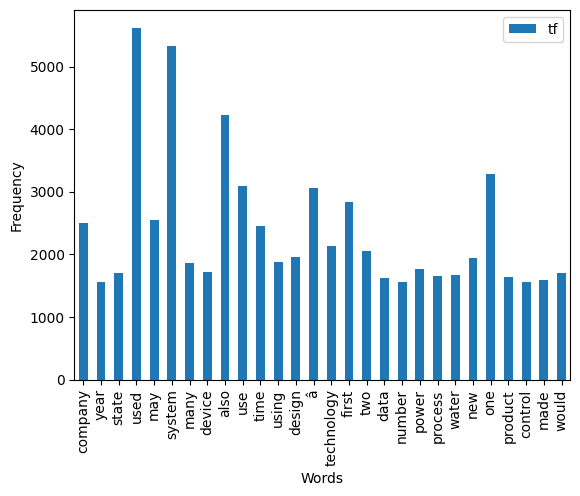

In [34]:
tf.columns = ["words", "tf"]
tf[tf["tf"] > 1500].plot.bar(x="words",y="tf") #1500den fazla geçen kelimelerin görseli
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

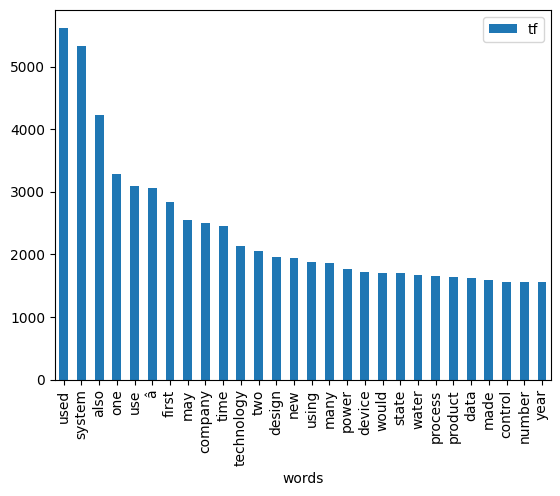

In [40]:
# Sıralama işlemi ve 1500'den büyük olan kelimeleri filtreleme
sorted_tf = tf.sort_values("tf", ascending=False)  # 'tf' sütununa göre azalan sıralama
filtered_tf = sorted_tf[sorted_tf["tf"] > 1500]    # 'tf' değeri 1500'den büyük olanları filtrele

# Bar grafiği oluşturma
filtered_tf.plot.bar(x="words", y="tf")
plt.show()

## Adım 3: Kelimeleri WordCloud ile görselleştiriniz.

In [43]:
from wordcloud import WordCloud

In [42]:
text = " ".join(x for x in df["text"])

In [48]:
wordcloud = WordCloud(max_font_size=50, max_words=150).generate(text)

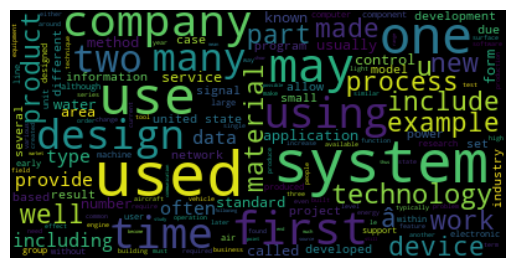

In [49]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Görev 3:  Tüm Aşamaları Tek Bir Fonksiyon Olarak Yazınız

## Adım 1: Metin ön işleme işlemlerini gerçekleştiriniz.

## Adım 2: Görselleştirme işlemlerini fonksiyona argüman olarak ekleyiniz.

## Adım 3: Fonksiyonu açıklayan 'docstring' yazınız.

In [52]:
def On_Islem(text, BarPlot = False, wordcloud = False):
    """ArithmeticError"""
    text = text.str.lower() #büyük küçük harf dönüşümü
    text = text.str.replace("\n", " ", regex=True) #\n ifadesinin yerine bir karakter boşluk ekleyecek
    text = text.str.replace("[^\w\s]", "", regex=True) #Noktalama işaretlerini kaldırır
    text = text.str.replace("\d", "", regex=True) #Sayılsal ifadeleri kaldırır. \d+ sayısal ifade ve şekilleri kaldırır.

    #stopwords
    stop_words = stopwords.words("English")
    text = text.apply(lambda y: " ".join(x for x in str(y).split() if x not in stop_words))

    #rare words
    sil = pd.Series(" ".join(text).split()).value_counts()[-1000:]
    text = text.apply(lambda y: " ".join(x for x in y.split() if x not in sil))

    #lemmatization
    text = text.apply(lambda y: " ".join([Word(kelime).lemmatize() for kelime in y.split()]))

    if BarPlot:
        # Frekans hesaplama
        tf = text.apply(lambda y: pd.value_counts(y.split(" "))).sum(axis=0).reset_index()

        # Sütun isimlendirilmesi
        tf.columns = ["words", "tf"]

        # 1500'den fazla geçen kelimelerin görseli
        tf[tf["tf"]>1500].plot.bar(x="words", y="tf")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.show()

    if wordcloud:
        text = " ".join(x for x in text)
        _wordcloud = WordCloud(max_font_size=50, max_words=150).generate(text)
        plt.figure()
        plt.imshow(_wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

    return text

In [53]:
On_Islem(df["text"])

0       anovo anovo formerly novo computer service com...
1       battery indicator battery indicator also known...
2       bob pea robert allen pea august june analog in...
3       cavnet cavnet secure military forum became ope...
4       clidar clidar scientific instrument used measu...
                              ...                        
1995    edinburgh calotype club edinburgh calotype clu...
1996    endrin endrin chemical formula first produced ...
1997    ethylene glycol dinitrate ethylene glycol dini...
1998    forge de syam forge de syam syam forge forge w...
1999    frankkamenetskii theory combustion frankkamene...
Name: text, Length: 2000, dtype: object

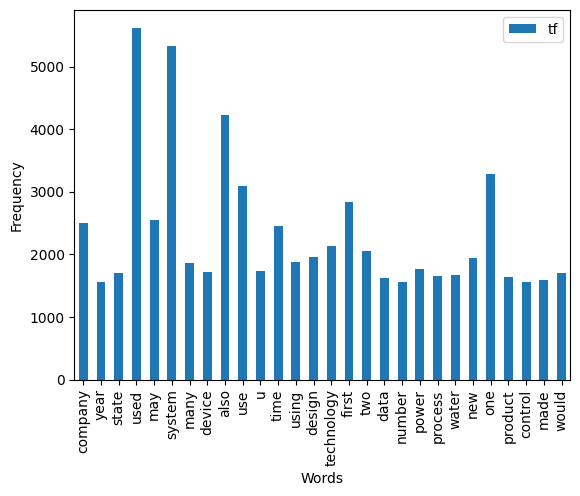

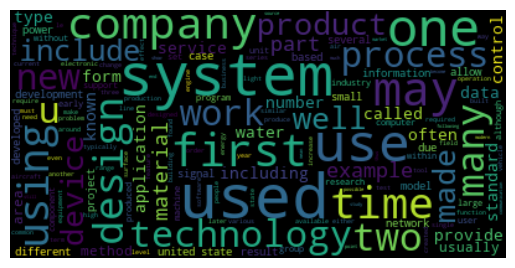

'anovo anovo formerly novo computer service company based france founded went public currently member cac small category service repair mobile news award four year row november score rating site reviewer giving company lowest possible rating battery indicator battery indicator also known battery gauge device give information battery usually visual indication battery state charge particularly important case battery electric vehicle automobile fitted battery condition meter monitor starter battery meter essentially voltmeter may also marked coloured zone easy visualization many newer car longer offer voltmeter ammeter instead vehicle typically light outline automotive battery somewhat misleading may confused indicator bad battery reality indicates problem vehicle charging system alternatively ammeter may fitted indicates whether battery charged discharged adjacent picture ammeter marked alternator symbol c charge discharge ammeter voltmeter individually together used as operating state a

In [54]:
On_Islem(df["text"], True, True)